In [50]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image # for image processing and loading
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, TensorDataset 
# DataLoader is for loading data in batches
# TensorDataset is for custom dataset
from torchvision.utils import save_image
import matplotlib.pyplot as plt 
import torchvision.transforms as transforms

# from google.colab import drive -> 구글 드라이브 연동 시 사용 (라이브러리)


In [51]:
#drive.mount('/content/drive') 구글 드라이브 연결 

In [52]:
torch.manual_seed(777)
IMAGE_SIZE = 128 # 훈련 시키려면 이미지 크기를 통일 시켜야함. 128x128로 통일

device='cuda' if torch.cuda.is_available() else 'cpu'
if device=='cuda':
    torch.cude.manual_seed_all(777)
    

In [53]:
original_datasets=ImageFolder(root='flower_photos/', 
                                transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()])) # 이미지 폴더에서 이미지를 불러옴

In [54]:
print(original_datasets) #Number of datapoints: 2313 -> 2313개의 이미지가 있음
# anti aliasing은 이미지를 축소할 때 이미지의 품질을 유지하기 위해 사용하는 기술

Dataset ImageFolder
    Number of datapoints: 2313
    Root location: flower_photos/
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [55]:
original_loader=DataLoader(original_datasets, 
                           batch_size=2313, # 2313 -> 전체 데이터를 한번에 불러옴
                           shuffle=True, # shuffle=False -> 데이터를 섞지 않음. 순서대로 불러옴
                            drop_last=False, # drop_last=False -> 데이터가 남아도 마지막 배치를 버리지 않음
                            num_workers=1) # num_workers=1 -> 데이터를 불러올 때 사용할 프로세스 수, 단일 프로세스 사용
# 이미지를 불러온 데이터셋을 DataLoader로 불러옴



In [56]:
for X, Y in original_loader:
    print(X.size(), Y.size())
    print(Y)
    break


torch.Size([2313, 3, 128, 128]) torch.Size([2313])
tensor([3, 0, 4,  ..., 4, 3, 2])


In [57]:
# 이미지 로더로 불러온 이미지와 라벨을 추출 -> next(iter(데이터로더))
#total_batch=len(original_loader)
#print(total_batch)

#for i in range(total_batch):
original_images, labels = next(iter(original_loader)) # next(iter(데이터로더)) -> 데이터로더에서 데이터를 하나씩 batch_size만큼 불러옴
print(original_images.shape)
print(labels.shape)

torch.Size([2313, 3, 128, 128])
torch.Size([2313])


In [58]:
print(labels[:10])

tensor([1, 3, 3, 0, 1, 3, 2, 2, 4, 3])


In [59]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



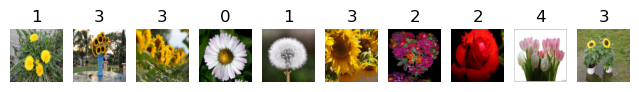

In [60]:
plt.figure(figsize=(8,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(labels[i].item())
    plt.imshow(original_images[i].permute(1,2,0)) # permute -> 차원을 바꿔줌 -> 이미지는 (가로,세로,채널)로 되어있는데, (채널,가로,세로)로 바꿔줘야함
    plt.axis('off') # 축을 없앰
plt.show()

In [61]:
X1=original_images # 128 x 128 x 3 이미지 (가로,세로,채널)
Y1=labels 
print(X.size(), Y.size())

torch.Size([2313, 3, 128, 128]) torch.Size([2313])


In [62]:
# 이미지 증강

Image_transform=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.CenterCrop((IMAGE_SIZE,IMAGE_SIZE)), # 이미지 중앙을 기준으로 이미지 크롭-> 이미지 크기를 128x128로 통일
    transforms.ToTensor()
])

In [63]:
transforms_dataset=ImageFolder(root='flower_photos/', 
                                transform=Image_transform) # 이미지 폴더에서 이미지를 불러옴
transforms_loader=DataLoader(transforms_dataset, 
                             batch_size=100, 
                             shuffle=True,
                             num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴

In [64]:
transforms_images, transforms_labels=next(iter(transforms_loader)) # image 100개를 불러옴

In [65]:
print(transforms_images.size(), transforms_labels.size())
X2=torch.cat([X1, transforms_images], dim=0) # 이미지를 합침
Y2=torch.cat([Y1, transforms_labels], dim=0) # 라벨을 합침
print(X2.size(), Y2.size())

torch.Size([100, 3, 128, 128]) torch.Size([100])
torch.Size([2413, 3, 128, 128]) torch.Size([2413])


In [66]:
# image를 128x128로 크롭한 이미지를 출력


none_datasets=ImageFolder(root='flower_photos/',
                            transform=transforms.Compose([
                                transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                transforms.ToTensor()
                            ])) # 이미지 폴더에서 이미지를 불러옴

none_loader=DataLoader(none_datasets, batch_size=100, shuffle=False,
                          num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴

In [67]:
none_images, none_labels=next(iter(none_loader))

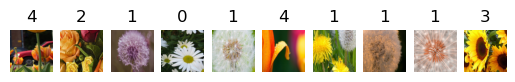

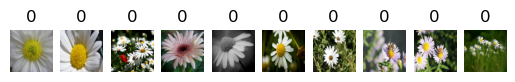

In [68]:
# 이미지 크기를 128x128로 통일한 이미지와 원본 이미지를 비교

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(transforms_labels[i].item())
    plt.imshow(transforms_images[i].permute(1,2,0)) 
    plt.axis('off') 
plt.show()



for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(none_labels[i].item())
    plt.imshow(none_images[i].permute(1,2,0)) 
    plt.axis('off') 
plt.show()

In [69]:
def create_loader(transform): 
    transforms_dataset=ImageFolder(root='flower_photos/',
                                transform=transform) # 이미지 폴더에서 이미지를 불러옴
    transforms_loader=DataLoader(transforms_dataset,
                                batch_size=1000,
                                shuffle=True,
                                num_workers=1) # 이미지를 불러온 데이터셋을 DataLoader로 불러옴
    
    transforms_images, labels=next(iter(transforms_loader)) # image 100개를 불러옴
    return transforms_images, labels

In [70]:
Image_transform=transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.ColorJitter(brightness=(0.7,0.9),
                            contrast=(1,1), 
                            saturation=(0.7,0.9), 
                            #hue=(-0.2, 0.2) # 이미지의 밝기, 대비, 채도, 색조를 변경
                ),

    transforms.ToTensor()
])
color_tf_images, color_tf_labels=create_loader(Image_transform)

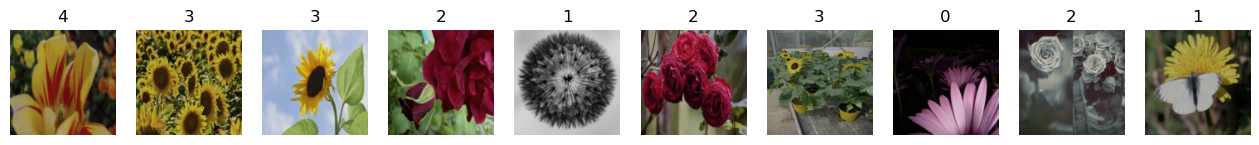

In [71]:
plt.figure(figsize=(16,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.title(color_tf_labels[i].item())
    plt.imshow(color_tf_images[i].permute(1,2,0)) 
    plt.axis('off') 
plt.show()

In [72]:
X3=torch.cat([X2, color_tf_images], dim=0) # 이미지를 합침
Y3=torch.cat([Y2, color_tf_labels], dim=0) # 라벨을 합침
print(X3.size(), Y3.size())

torch.Size([3413, 3, 128, 128]) torch.Size([3413])


In [73]:
# Define the transformations with horizontal flip
Image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.RandomHorizontalFlip(p=0.8),  # 이미지를 수평으로 뒤집음
    transforms.ToTensor()
])

flip_tf_images, flip_tf_labels=create_loader(Image_transform)
X4=torch.cat([X3, flip_tf_images], dim=0) # 이미지를 합침
Y4=torch.cat([Y3, flip_tf_labels], dim=0) # 라벨을 합침
print(X4.size(), Y4.size())

torch.Size([4413, 3, 128, 128]) torch.Size([4413])


In [74]:
Image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
    transforms.RandomRotation(degrees=(-15, 15), # 이미지를 -15도에서 15도 사이로 회전
                              interpolation=transforms.InterpolationMode.BILINEAR, fill=0), # 이미지를 회전할 때 보간법 사용
        transforms.ToTensor()
])
rot_tf_images, rot_tf_labels=create_loader(Image_transform)
X5=torch.cat([X4, rot_tf_images], dim=0) # 이미지를 합침
Y5=torch.cat([Y4, rot_tf_labels], dim=0) # 라벨을 합침
print(X5.size(), Y5.size())

torch.Size([5413, 3, 128, 128]) torch.Size([5413])


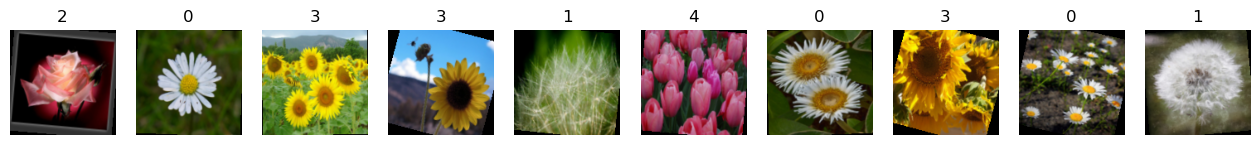

In [75]:
# Plot transformed images
plt.figure(figsize=(16, 4))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.title(rot_tf_labels[i].item())
    plt.imshow(rot_tf_images[i].permute(1, 2, 0))
    plt.axis('off')
plt.show()

In [76]:
#Gaussian noise

""" image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    #GaussianBlur 
    transforms.GaussianBlur(kernel_size=(3,3), sigma=(1.0, 2.0)), # 이미지에 가우시안 블러를 적용
    transforms.ToTensor()
])

GB_tf_images, GB_tf_labels = create_loader(image_transform)
X6 = torch.cat([X5, GB_tf_images], dim=0)
Y6 = torch.cat([Y5, GB_tf_labels], dim=0)
print(X6.size(), Y6.size()) """

' image_transform = transforms.Compose([\n    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),\n    #GaussianBlur \n    transforms.GaussianBlur(kernel_size=(3,3), sigma=(1.0, 2.0)), # 이미지에 가우시안 블러를 적용\n    transforms.ToTensor()\n])\n\nGB_tf_images, GB_tf_labels = create_loader(image_transform)\nX6 = torch.cat([X5, GB_tf_images], dim=0)\nY6 = torch.cat([Y5, GB_tf_labels], dim=0)\nprint(X6.size(), Y6.size()) '

In [77]:
""" image_transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    #RandomAdjustSharpness: 이미지에 랜덤으로 샤프닝을 적용
    transforms.RandomAdjustSharpness(sharpness_factor=0.5, p=0.9), # 이미지에 랜덤으로 샤프닝을 적용
    transforms.ToTensor()
])

sp_tf_images, sp_tf_labels = create_loader(image_transform)
X7 = torch.cat([X6, sp_tf_images], dim=0)
Y7 = torch.cat([Y6, sp_tf_labels], dim=0)
print(X7.size(), Y7.size()) # 1000개의 이미지와 라벨이 생성됨 """

' image_transform = transforms.Compose([\n    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),\n    #RandomAdjustSharpness: 이미지에 랜덤으로 샤프닝을 적용\n    transforms.RandomAdjustSharpness(sharpness_factor=0.5, p=0.9), # 이미지에 랜덤으로 샤프닝을 적용\n    transforms.ToTensor()\n])\n\nsp_tf_images, sp_tf_labels = create_loader(image_transform)\nX7 = torch.cat([X6, sp_tf_images], dim=0)\nY7 = torch.cat([Y6, sp_tf_labels], dim=0)\nprint(X7.size(), Y7.size()) # 1000개의 이미지와 라벨이 생성됨 '

In [78]:
cnt0=(Y5==0).sum()
cnt1=(Y5==1).sum()
cnt2=(Y5==2).sum()
cnt3=(Y5==3).sum()
cnt4=(Y5==4).sum()
print(cnt0, cnt1, cnt2, cnt3, cnt4)

tensor(923) tensor(1329) tensor(1039) tensor(1200) tensor(922)


In [79]:
# 훈련 데이터셋과 테스트 데이터셋을 나눔

X=X5
Y=Y5
ratios=[0.8, 0.2] # 훈련 데이터셋과 테스트 데이터셋의 비율
print(Y.size())
train_cnt=int(X.size(0)*ratios[0]) # 훈련 데이터셋의 개수
test_cnt=int(X.size(0)*ratios[1]) # 테스트 데이터셋의 개수
cnts=[train_cnt, test_cnt]
print(test_cnt, train_cnt)


torch.Size([5413])
1082 4330


In [80]:
indices=torch.randperm(X.size(0)) # 데이터를 섞음
print(indices[:10])

tensor([5241, 1624, 4830, 3418, 1929, 2967, 4784, 1897,  148, 4006])


In [83]:

x=torch.index_select(X, dim=0, index=indices) # 데이터를 섞음
y=torch.index_select(Y, dim=0, index=indices) # 데이터를 섞음

x_train=x[:cnts[0]] # 훈련 데이터셋: ~ cnts[0]까지  
x_test=x[cnts[0]:] # 테스트 데이터셋: ~ 끝까지
y_train=y[:cnts[0]] # 훈련 데이터셋: ~ cnts[0]까지
y_test=y[cnts[0]:] # 테스트 데이터셋: ~ 끝까지

print(x_train.size(), y_train.size())
print(x_test.size(), y_test.size())



torch.Size([4330, 3, 128, 128]) torch.Size([4330])
torch.Size([1083, 3, 128, 128]) torch.Size([1083])


--------------데이터 만들기 END------------------

-----------모델 작성 START------------

In [84]:
train_dataset=TensorDataset(x_train, y_train) # torchvision에 있는 TensorDataset을 사용하여 훈련 데이터셋을 생성
test_dataset=TensorDataset(x_test, y_test)  


In [85]:
train_loader=DataLoader(train_dataset, 
                        batch_size=100,
                        shuffle=True,
                        drop_last=False) 
test_loader=DataLoader(test_dataset)

In [86]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()

        # conv1: 입력(3, 128, 128) 
        self.conv1=nn.Conv2d( 
                   in_channels=3,
                   out_channels=8,
                     kernel_size=3,
                        stride=1,
                        padding=1
                        )
        # conv2: 입력(8, 128, 128) 
        self.conv2=nn.Conv2d( 
                        in_channels=8,
                        out_channels=16,
                        kernel_size=3,
                        stride=1,
                        padding=1
                        )
        # conv3: 입력(16, 64, 64)
        self.conv3=nn.Conv2d(
                        in_channels=16,
                        out_channels=32,
                        kernel_size=3,
                        stride=1,
                        padding=1
                        )
        # conv4: 입력(32, 32, 32)
        self.conv4=nn.Conv2d(
                        in_channels=32,
                        out_channels=64,
                        kernel_size=3,
                        stride=1,
                        padding=1
                        )
        
        # conv5: 입력(64, 16, 16)
        self.conv5=nn.Conv2d(
                        in_channels=64,
                        out_channels=128,
                        kernel_size=3,
                        stride=1,
                        padding=1
                        )
        



        # maxpooling
        self.pool=nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1=nn.Linear(128*4*4, 128) # fully connected layer. 128 설정 이유
        self.fc2=nn.Linear(128, 64)
        self.fc3=nn.Linear(64, 5) # 5개의 클래스로 분류 

    def forward(self, x):
        x=self.conv1(x)
        x=torch.relu(x)
        x=self.pool(x) # (8, 64, 64)
        x=self.conv2(x)
        x=torch.relu(x)
        x=self.pool(x) # (16, 32, 32)
        x=self.conv3(x)
        x=torch.relu(x)
        x=self.pool(x) # (32, 16, 16)
        x=self.conv4(x)
        x=torch.relu(x)
        x=self.pool(x) # (64, 8, 8)
        x=self.conv5(x)
        x=torch.relu(x)
        x=self.pool(x) # (128, 4, 4)

        # 특징 추출
        x=x.view(-1, 128*4*4) # 128*4*4로 flatten. -1 -> batch size: 100
        #분류
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        x=torch.softmax(x, dim=1) # softmax를 통해 확률값으로 변환
        return x 



        
                   

In [89]:
# 모델 생성
model = CNN().to(device)
print(model)
optimizer=torch.optim.Adam(model.parameters(), lr=0.001) # Adam optimizer 사용
# CrossEntropyLoss: 다중 분류 손실 함수
criterion = nn.CrossEntropyLoss() # 손실 함수로 CrossEntropyLoss 사용

CNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=5, bias=True)
)


In [90]:


def train(epoch, model, train_loader, optimizer, interval): # interval: 100번째 배치마다 출력
    model.train() # 모델을 훈련 모드로 설정

    # 데이터로더에서 미니 배치를 하나씩 꺼내 학습 
    # 1개의 배치 사이즈에 대해 학습
    for batch_index, (image, label) in enumerate(train_loader):
        image=image.to(device)
        label=label.to(device)

        optimizer.zero_grad()   # 기울기 초기화
        y_hat=model(image)     # 모델에 이미지를 입력하여 예측값을 계산
        loss=criterion(y_hat, label)
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트

        # interval마다 로스 출력
        if batch_index % interval == 0:
            print('train Epoch: {}, Train Loss:{}'.format(epoch, loss.item()))


In [94]:
def evaluate(model, test_loader):
    model.eval() # 모델을 평가 모드로 설정
    test_loss=0 # 테스트 손실
    correct=0 # 맞은 개수

    with torch.no_grad(): # 기울기 계산 비활성화
        for image, label in test_loader:
            image=image.to(device)
            label=label.to(device)
            y_hat=model(image) # 모델에 이미지를 입력하여 예측값을 계산
            test_loss+= criterion(y_hat, label).item() # 손실 계산
            pred=y_hat.argmax(dim=1) # 확률이 가장 높은 클래스 선택
            correct += (pred==label).sum()

    test_loss=test_loss/len(test_loader.dataset) # 테스트 손실
    test_accuracy=correct/len(test_loader.dataset)*100 # 테스트 정확도
    return test_loss, test_accuracy

# epoch만큼 반복하여 훈련


In [99]:
epochs = 30
for epoch in range(1, epochs + 1):
    train( model, train_loader, optimizer, interval=100)  # model을 첫 번째 인수로 전달
    test_loss, test_accuracy = evaluate(model, test_loader)  # 테스트 데이터셋으로 모델 평가
    print('epoch: {}, test loss: {}, test accuracy: {}'.format(epoch, test_loss, test_accuracy))

train Epoch: 1, Train Loss:1.1792213916778564
epoch: 1, test loss: 1.173965494443395, test accuracy: 72.57617950439453
train Epoch: 2, Train Loss:1.1479460000991821
epoch: 2, test loss: 1.151962147470106, test accuracy: 75.16159057617188
train Epoch: 3, Train Loss:1.1446237564086914
epoch: 3, test loss: 1.1615823162779804, test accuracy: 74.05355834960938
train Epoch: 4, Train Loss:1.0813665390014648
epoch: 4, test loss: 1.1509556964603929, test accuracy: 75.25392150878906
train Epoch: 5, Train Loss:1.2050186395645142
epoch: 5, test loss: 1.1350149985055404, test accuracy: 76.91596984863281
train Epoch: 6, Train Loss:1.1042726039886475
epoch: 6, test loss: 1.1362143845219141, test accuracy: 76.63896942138672
train Epoch: 7, Train Loss:1.097476840019226
epoch: 7, test loss: 1.1399703263025645, test accuracy: 76.45429229736328
train Epoch: 8, Train Loss:1.0967329740524292
epoch: 8, test loss: 1.1313331864657274, test accuracy: 77.19297790527344
train Epoch: 9, Train Loss:1.06509220600128